In [1]:
import matplotlib.pyplot as plt
import time
import torch
from torch import logsumexp
from torch.distributions.multivariate_normal import MultivariateNormal
from torch.distributions.normal import Normal
import numpy as np

In [2]:
num_samples = 50
iterations = 5000
p_mu = 0.0
q_mu = torch.tensor([10.0], requires_grad=True)
# q_mu = torch.tensor([1.0], requires_grad=True)
q_sigma = torch.tensor([1.0])

lr = 1e-3

log_Z = np.log(np.sqrt((2*np.pi)))

In [3]:
EUBOs = []
ELBOs = []
for i in range(iterations):
    proposal = Normal(q_mu, q_sigma)
    xs = proposal.sample((num_samples,))
    log_gammas = (-1.0 / 2.0) * ((xs - p_mu) ** 2)
    log_q = proposal.log_prob(xs)

    log_weights = log_gammas - log_q
    weights = torch.exp(log_weights - logsumexp(log_weights, dim=0)).detach()
    eubo = torch.mul(weights, log_weights).sum()
    elbo = log_weights.mean()
    gradient = torch.autograd.grad(eubo, q_mu)
    q_mu = q_mu - lr * gradient[0]
    EUBOs.append(eubo.item())
    ELBOs.append(elbo.item())
#     print('iteration : %d, eubo : %f' % (i, eubo))

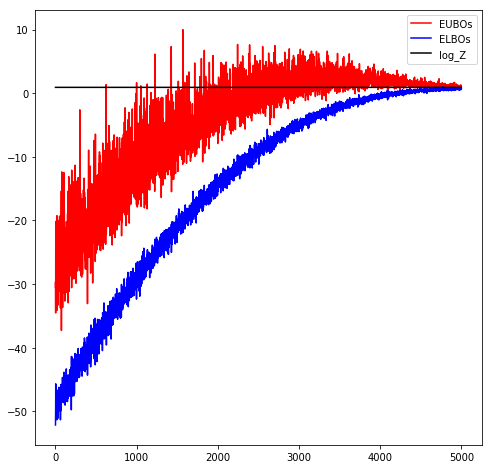

In [6]:
fig = plt.figure(figsize=(8,8))
# plt.plot(ELBOs)
ax = fig.add_subplot(111)
ax.plot(EUBOs, 'r', label='EUBOs')
ax.plot(ELBOs, 'b', label='ELBOs')
ax.plot(np.ones(iterations) * log_Z, 'k', label='log_Z')
ax.legend()
plt.savefig('rws_gradient_single_gaussian_samples=%d.png' % num_samples)

In [7]:
log_Z

0.9189385332046727